Statistic: 72.0
p-value: 0.2305126190185547
Same distribution (fail to reject H0)


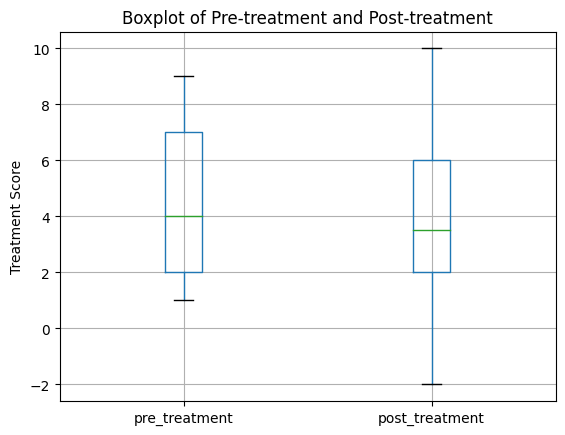

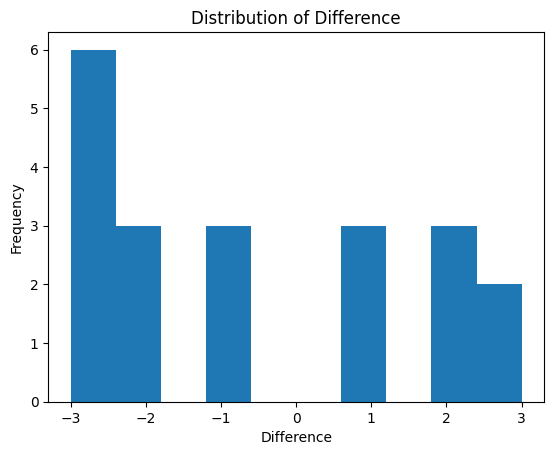

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# 데이터 만들기

pre_treatment = np.random.randint(1, 10, size = 20)
post_treatment = pre_treatment + np.random.randint(-3, 4, size = 20)

# pandas dataframe에 담고 csv 파일로 만들기

data = pd.DataFrame({'pre_treatment': pre_treatment, 'post_treatment': post_treatment})
data.to_csv('./data/treatment_data.csv', index = False)

# 다시 csv 파일을 dataframe으로 불러오기

data = pd.read_csv('./data/treatment_data.csv')

# Wilcoxon signed rank test 수행 후, 결과에 따라 H0 reject / fail to reject

stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

print('Statistic:', stat)
print('p-value:', p)

if p > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
    
# boxplot 그리기

fig, ax = plt.subplots()

data.boxplot(['pre_treatment', 'post_treatment'], ax = ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')

plt.show()

# treatment 전후의 차이값의 분포 그리기

data['diff'] = data['post_treatment'] - data['pre_treatment']

fig, ax = plt.subplots()

ax.hist(data['diff'], bins = 10)
ax.set_title('Distribution of Difference')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')

plt.show()

In [5]:
print(data['pre_treatment'])
print(data['post_treatment'])

0     6
1     1
2     7
3     3
4     7
5     2
6     9
7     4
8     5
9     3
10    9
11    8
12    2
13    2
14    4
15    2
16    3
17    1
18    8
19    5
Name: pre_treatment, dtype: int64
0      3
1      2
2      6
3      6
4      8
5      5
6      7
7      6
8      2
9      2
10     7
11     5
12     3
13     1
14     2
15     4
16     0
17    -2
18    10
19     2
Name: post_treatment, dtype: int64
